# Neural style Image Generation
Neural networks can also produc3 Higher dimension images. 

THis work is courtesy of www.fast.ai and https://arxiv.org/abs/1508.06576

    The whole notebook in simple words:
* Get output of the image to be neural styled at some convolution layer.
* Get output of random noise image at same convolution layer.
* Reduce noise of random noise image so that it is moreover similar to original image. 

    The detailed steps:
1. Get image. 
2. Preprocess image.
3. Create neural model.
4. Get output of the image.
5. Predict image.
6. Get
    1. Loss
    2. Gradients.
8. Create Random image. 
9. Solve the random image.
10. Evaluate both images.
11. Deprocess the image.
12. View the image. 

 

# 1. Get image

In [1]:
fpath = 'raj.jpg'

In [2]:
from PIL import Image

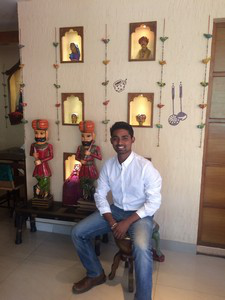

In [3]:
img = Image.open(fpath); img

# 2. Preprocess Image
* We subtract image by vgg mean

In [4]:
import numpy as np

In [61]:
img_arr = np.expand_dims(np.array(img),0) 
shp = img_arr.shape;
shp

(1, 300, 225, 3)

# 3.Create model

In [6]:
from keras.models import Sequential


Using TensorFlow backend.


In [7]:
from keras.layers import Dense, Conv2D, Flatten, AveragePooling2D, Dropout, ZeroPadding2D

### Note: When you are adding nodes for dense layer, you might encounter 'Resource Exhausted Error'
    So, Try out some values and check by yourself. 
    I have tried 500,250,125,100. 
    100 works for me.

In [62]:
model = Sequential([
    Conv2D(64,3,3, input_shape=(300,225,3), activation='relu'),
    ZeroPadding2D(padding=(1,1)),
    
    Conv2D(128,3,3, activation='relu'),
    AveragePooling2D(pool_size=(2,2)),
    ZeroPadding2D(padding=(1,1)),
    
    Conv2D(256,3,3, activation='relu'),
    AveragePooling2D(pool_size=(2,2)),
        
    Flatten(),
    
    Dense(100,activation='relu'),
    Dropout(0.2),
    
    Dense(100,activation='relu'),
    Dropout(0.2),

    Dense(1, activation='softmax')
])


C:\Users\Chaitra\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(64, (3, 3), input_shape=(300, 225,..., activation="relu")`
  
C:\Users\Chaitra\Anaconda3\lib\site-packages\ipykernel_launcher.py:5: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(128, (3, 3), activation="relu")`
  """
C:\Users\Chaitra\Anaconda3\lib\site-packages\ipykernel_launcher.py:9: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(256, (3, 3), activation="relu")`
  if __name__ == '__main__':


In [63]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_28 (Conv2D)           (None, 298, 223, 64)      1792      
_________________________________________________________________
zero_padding2d_19 (ZeroPaddi (None, 300, 225, 64)      0         
_________________________________________________________________
conv2d_29 (Conv2D)           (None, 298, 223, 128)     73856     
_________________________________________________________________
average_pooling2d_19 (Averag (None, 149, 111, 128)     0         
_________________________________________________________________
zero_padding2d_20 (ZeroPaddi (None, 151, 113, 128)     0         
_________________________________________________________________
conv2d_30 (Conv2D)           (None, 149, 111, 256)     295168    
_________________________________________________________________
average_pooling2d_20 (Averag (None, 74, 55, 256)       0         
__________

# 4.Get output of the image
    Getting activations of the rear end convolutional model

In [64]:
layer = model.get_layer('conv2d_30').output

In [16]:
import keras.backend as K
from keras.models import Model

Lets calculate the target activations of this layer

In [66]:
layer_model = Model(model.input, layer)
targ = K.variable(layer_model.predict(img_arr))

after running this, there was no gpu load, IDK why.

Define an object which extracts loss function and gradients seperately.For that we use scikit-learns optimizers

In [67]:
class evaluator(object):
    def __init__(self,f,shp): self.f, self.shp=f,shp
        
    def loss(self,x):
        loss_, self.grad_values = self.f([x.reshape(self.shp)])
        return loss_.astype(np.float64)
    
    def grads(self,x):
        return self.grad_values.flatten().astype(np.float64)

Defining loss function to calculate the mean squared error between the outputs at convolution layer.

In [43]:
from keras import metrics

In [70]:
loss = metrics.mse(layer,targ)
grads = K.gradients(loss,model.input)
fn = K.function([model.input], [loss]+grads)
eval_values = evaluator(fn,shp)

Function to optimize loss function with a deterministic approach to optimization that uses a line search, which we implement with sklearns fmin_l_bfggs_b function. and i have no idea why it is line search. 

In [86]:
import openCV

ImportError: No module named 'openCV'

In [87]:
def solve_image(eval_obj, niter, x):
    for i in range(niter):
        x, min_val, info = fmin_l_bfgs_b(eval_obj.loss, x.flatten(), fprime=eval_obj.grads, maxfun =20)
        x = np.clip(x, -127,127)
        print('current loss value:', min_val)
        im.save('filtered{i}.png',x )
    return x
        

generating random image

In [79]:
%matplotlib inline
import matplotlib.pyplot as plt
from scipy.optimize import fmin_l_bfgs_b

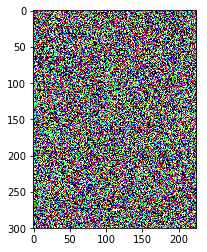

In [88]:
rand_img = lambda shape:np.random.uniform(-2.5,2.5,shape)/100
x = rand_img(shp)
plt.imshow(x[0])

In [91]:
x = solve_image(eval_values, 10,x)

current loss value: [[[  18.39347458   26.18280411   29.20071793 ...,  121.76042938
    121.37579346   80.05686188]
  [  27.06819153   42.47068405   47.80130386 ...,  207.36981201
    206.29229736  145.70568848]
  [  27.27383995   42.54069519   47.91960144 ...,  225.3789978
    223.69262695  158.0663147 ]
  ..., 
  [  35.33208466   55.2820282    63.95376587 ...,  100.57736206
     98.07578278   68.0471344 ]
  [  31.82525444   50.15856934   58.11428452 ...,   92.56852722
     90.03591919   63.75725174]
  [  20.50620079   31.13997841   35.57541656 ...,   56.5231514
     54.68819427   37.60318756]]]


NameError: name 'im' is not defined

In [90]:
import scipy